## Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

#### Importing Necessary Librariess

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import missingno as msno
import scikitplot as skplt

#Importing DataCleaning Libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


#Importing Classification Models 

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Importing Serialization libraries
import joblib

In [3]:
#Loading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv",sep=',')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print("Print shape of our Dataset is",df.shape)

Print shape of our Dataset is (614, 13)


## Exploratory Data Analysis(EDA)

### About Dataset:


- Features : 
    - Loan_ID : unique ID in loan application
    - Gender : Male , Female
    - Married : Yes, No
    - Dependents : Number of breadearners in a family, 0,1,2,3+ 
    - Education : Highest Qualification
    - Self_Employed : Owns a business or not.
    - ApplicantIncome : Income of Loan Applicant
    - CoapplicantIncome : Income of partner in joint loan
    - Loan_Amount : Amount needed for the Loan
    - Loan_Amount_Term : Time period in which loan needs to be paid off
    - Credit History : History of loan taking and paying off
    - Property_Area : Area of Property owned by the applicant
    
    
- Target Varriable:

    - Loan_Status : Y = Yes(Approved), N = NO(Not approved)

In [5]:
# Analysing Dtypes of columns and checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Checking for duplicates
df.duplicated().sum()

0

In [7]:
#Checking for null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


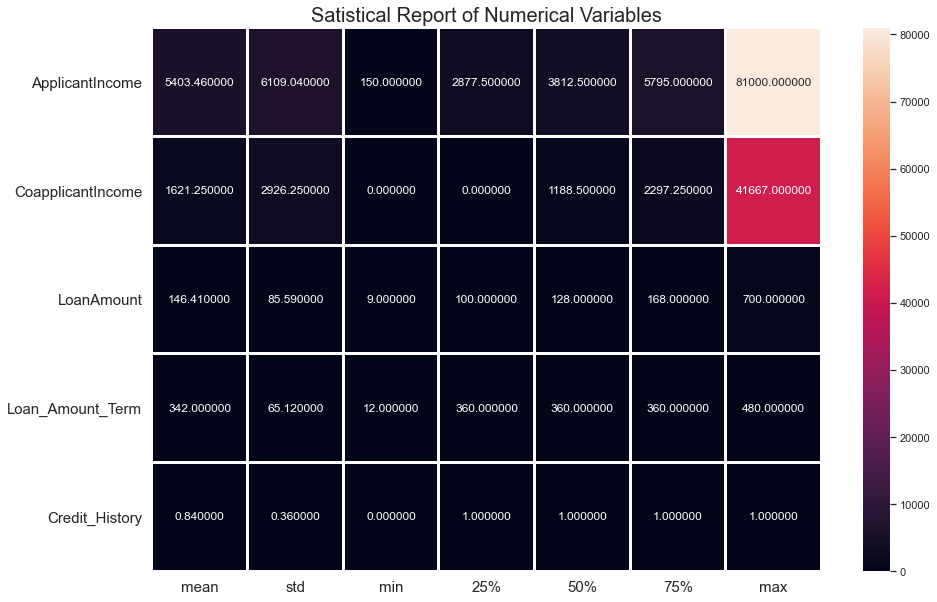

In [9]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15, rotation = 360)
plt.title("Satistical Report of Numerical Variables", fontsize = 20)
plt.show()

- ApplicantIncome:
    - Mean : 5043.46
    - Std : 6109.04
    - min : 150
    - max : 81000

- CoapplicantIncome:
    - Mean : 1621.25
    - Std : 2926.25
    - min : 0
    - max : 41667

- LoanAmount:
    - Mean : 146.41
    - Std : 85.59
    - min : 9
    - max : 700
    
- Loan_Amount_Term:
    - Mean : 342
    - Std : 65.12
    - min : 12
    - max : 480
    
- Credit_History:
    - Mean : 0.84
    - Std :0.36
    - min : 0
    - max : 1

### Univariate Analysis

<AxesSubplot:ylabel='None'>

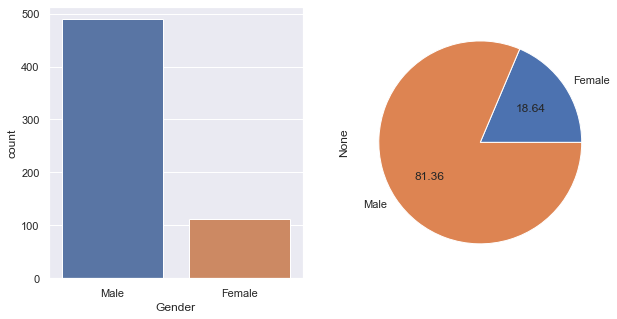

In [10]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Gender'], ax = ax[0])
df.groupby('Gender').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

- We've 81.36% male dominant data for loan application.

<AxesSubplot:ylabel='None'>

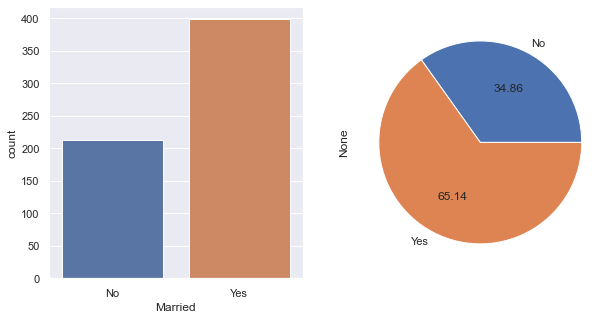

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Married'], ax = ax[0])
df.groupby('Married').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

- 65.14% Applicants applied for loan are married.

<AxesSubplot:ylabel='None'>

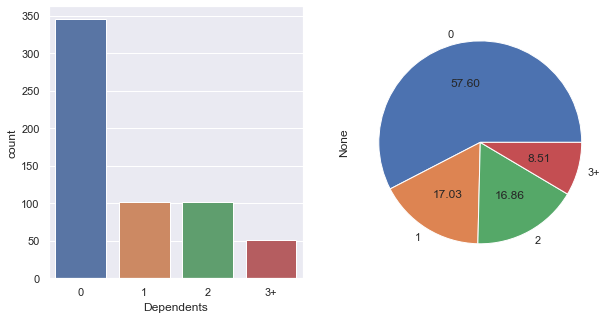

In [12]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Dependents'], ax = ax[0])
df.groupby('Dependents').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

- People with 0 dependents have highly applied for loans where people with 3+ dependents have applied very less.

<AxesSubplot:ylabel='None'>

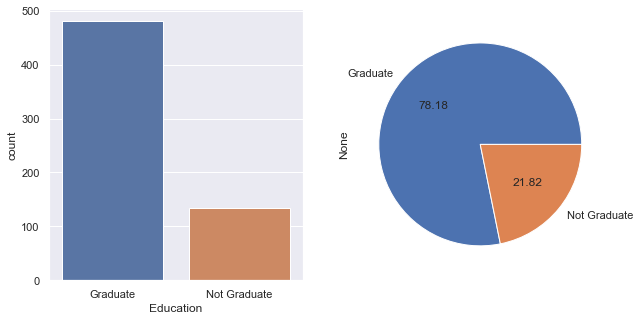

In [13]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Education'], ax = ax[0])
df.groupby('Education').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

- 78.18% applicants are graduate degree holders.

<AxesSubplot:ylabel='None'>

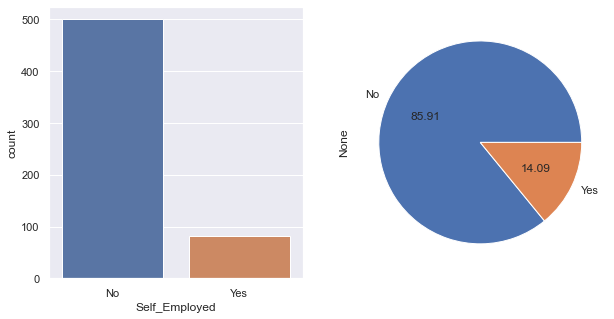

In [14]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Self_Employed'], ax = ax[0])
df.groupby('Self_Employed').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

- Only 14.09% Applicants own their business. Others might be employed by Employers.

<AxesSubplot:ylabel='None'>

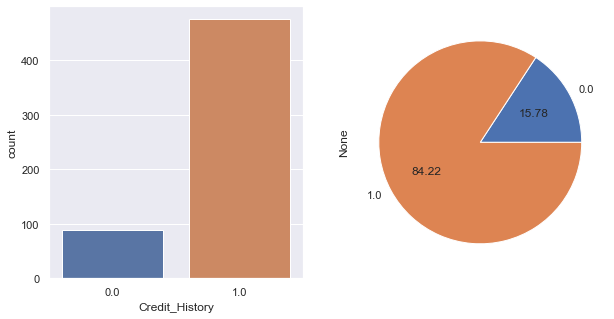

In [15]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Credit_History'], ax = ax[0])
df.groupby('Credit_History').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

- More than 80% applicants have a credit history which makes them more capable of approving their loans.

<AxesSubplot:ylabel='None'>

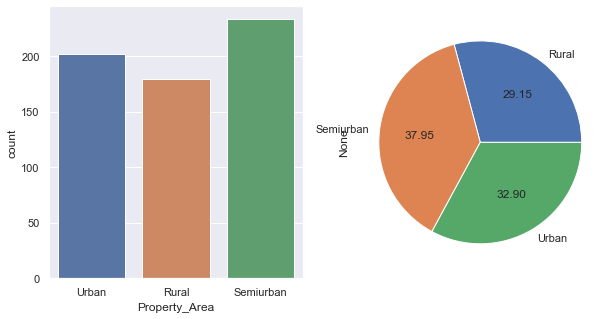

In [16]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Property_Area'], ax = ax[0])
df.groupby('Property_Area').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

- Applicants have properties as their debt payer incase they fail to repay the loan. Most Applicants have their properties in Semi-Urban Areas.

<AxesSubplot:ylabel='None'>

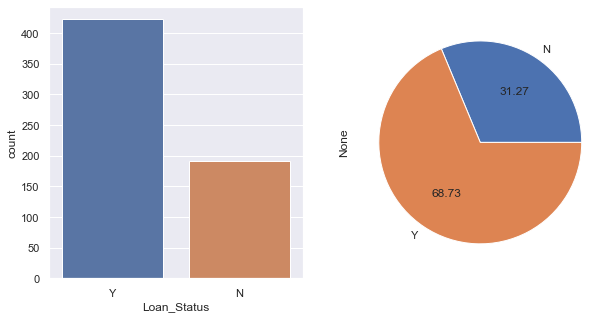

In [17]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Loan_Status'], ax = ax[0])
df.groupby('Loan_Status').size().plot(kind='pie', autopct='%.2f', ax =ax[1])

- There's a class imbalance. 68.73% People have their loan approved whereas 31.27% people got their loan applications rejected.

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

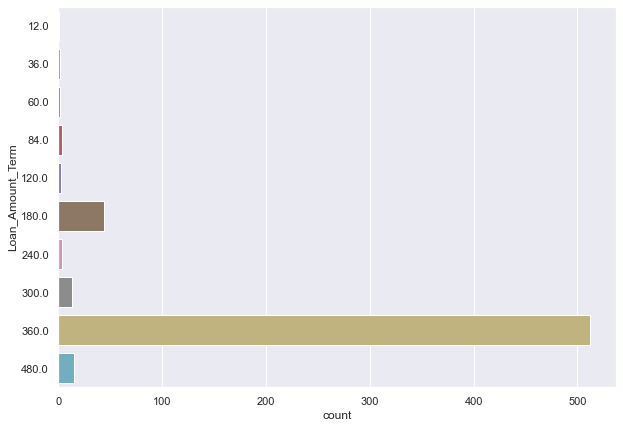

In [18]:
plt.figure(figsize = (10,7))
sns.countplot(data = df, y = 'Loan_Amount_Term')

- We've Loan_Amount_term within the span of 12 days to 480 days.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

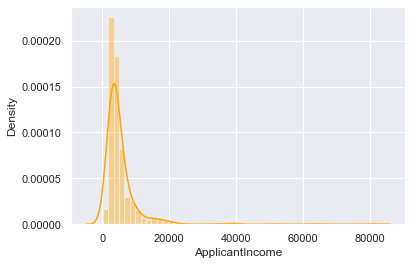

In [19]:
#Visualising Distribution of ApplicationIncome
sns.distplot(df['ApplicantIncome'],color ='orange')

- We've rightly - skewed data.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

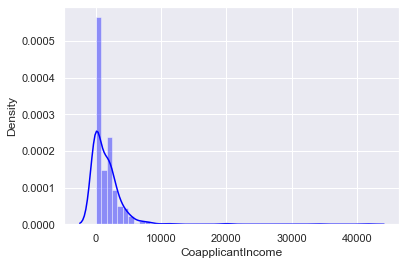

In [20]:
#Visualising Distribution of CoapplicationIncome
sns.distplot(df['CoapplicantIncome'],color ='blue')

- We've rightly - skewed data.

### Bivariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

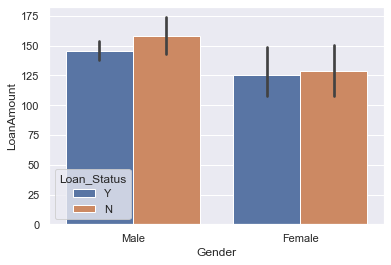

In [21]:
sns.barplot(data = df, x = 'Gender', y = 'LoanAmount', hue ='Loan_Status')

- Males tend to get their loan approved more than the Women.

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

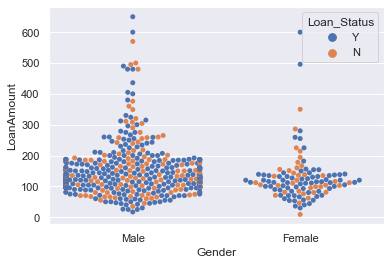

In [22]:
sns.swarmplot(data = df, x = 'Gender', y = 'LoanAmount', hue ='Loan_Status')

- Males tend to get their loan approved more than the Women with higher loan amount.

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

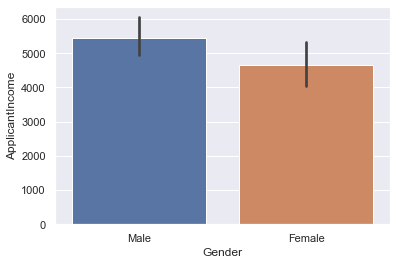

In [23]:
sns.barplot(data = df, x = 'Gender', y = 'ApplicantIncome')

- Male Applicants have higher Income than Women applicants.

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

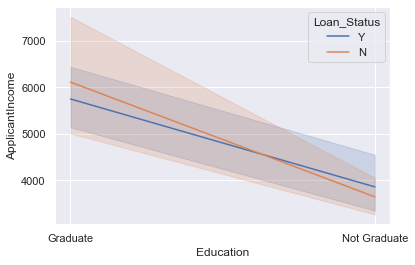

In [24]:
sns.lineplot(data = df, x = 'Education', y = 'ApplicantIncome', hue ='Loan_Status')

- Graduates have higher income than Non-Graduates.

<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>

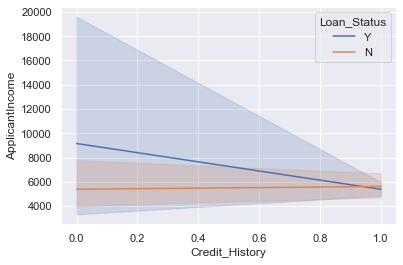

In [25]:
sns.lineplot(data = df, x = 'Credit_History', y = 'ApplicantIncome', hue ='Loan_Status')

- Applicants with higher income tend to have a Credit_History

<AxesSubplot:xlabel='Property_Area', ylabel='ApplicantIncome'>

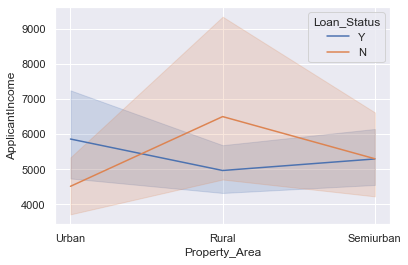

In [26]:
sns.lineplot(data = df, x = 'Property_Area', y = 'ApplicantIncome', hue ='Loan_Status')

- Higher Applicant Income have properties in Urban areas

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

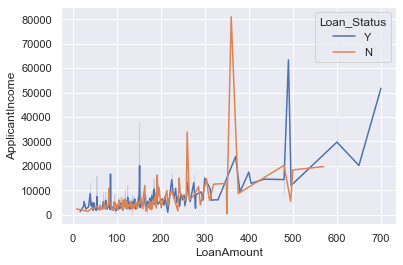

In [27]:
sns.lineplot(data = df, x = 'LoanAmount', y = 'ApplicantIncome', hue ='Loan_Status')

- There are more number of Applicants with Loan Amount 500.

<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

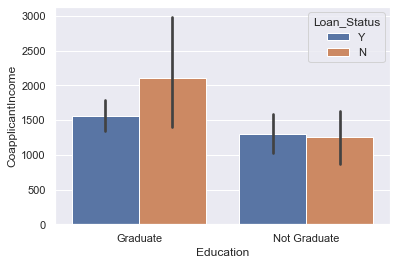

In [28]:
sns.barplot(data = df, x = 'Education', y = 'CoapplicantIncome', hue ='Loan_Status')

### Multivariate Analysis

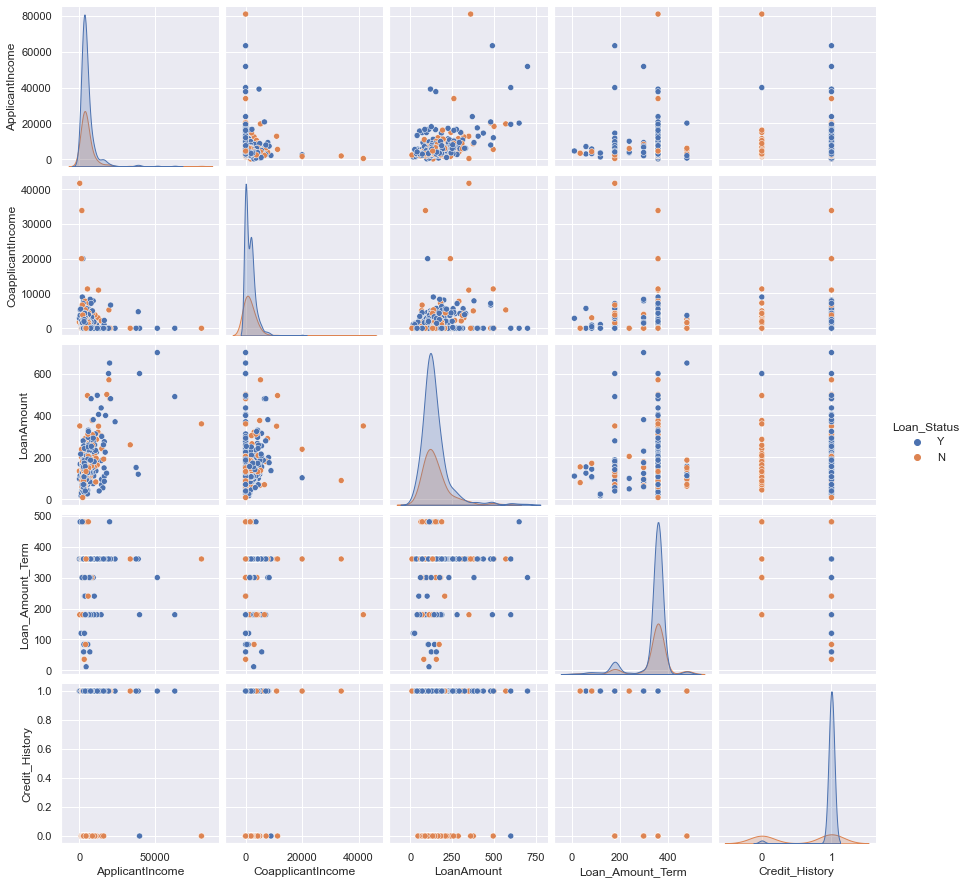

In [29]:
sns.pairplot(df, hue = 'Loan_Status')

- There is no multicollinearity problem in our dataset.

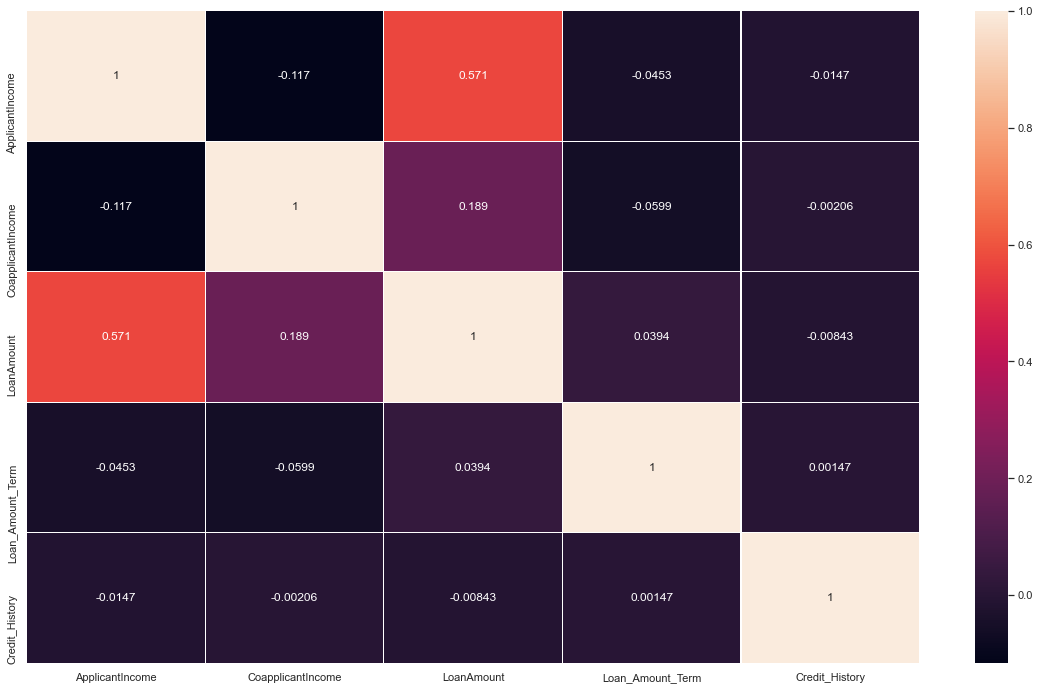

In [30]:
#Visualising correlation table
plt.figure(figsize = [20,12])
sns.heatmap(df.corr(), annot = True,linewidths=0.1,fmt = '.3g' )
plt.show()

- There is no multicollinearity problem inour dataset.

### Data Cleaning

In [31]:
# Check for null values in percentage
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

Loan_ID               0.0 %
Gender               2.12 %
Married              0.49 %
Dependents           2.44 %
Education             0.0 %
Self_Employed        5.21 %
ApplicantIncome       0.0 %
CoapplicantIncome     0.0 %
LoanAmount           3.58 %
Loan_Amount_Term     2.28 %
Credit_History       8.14 %
Property_Area         0.0 %
Loan_Status           0.0 %
dtype: object

<AxesSubplot:>

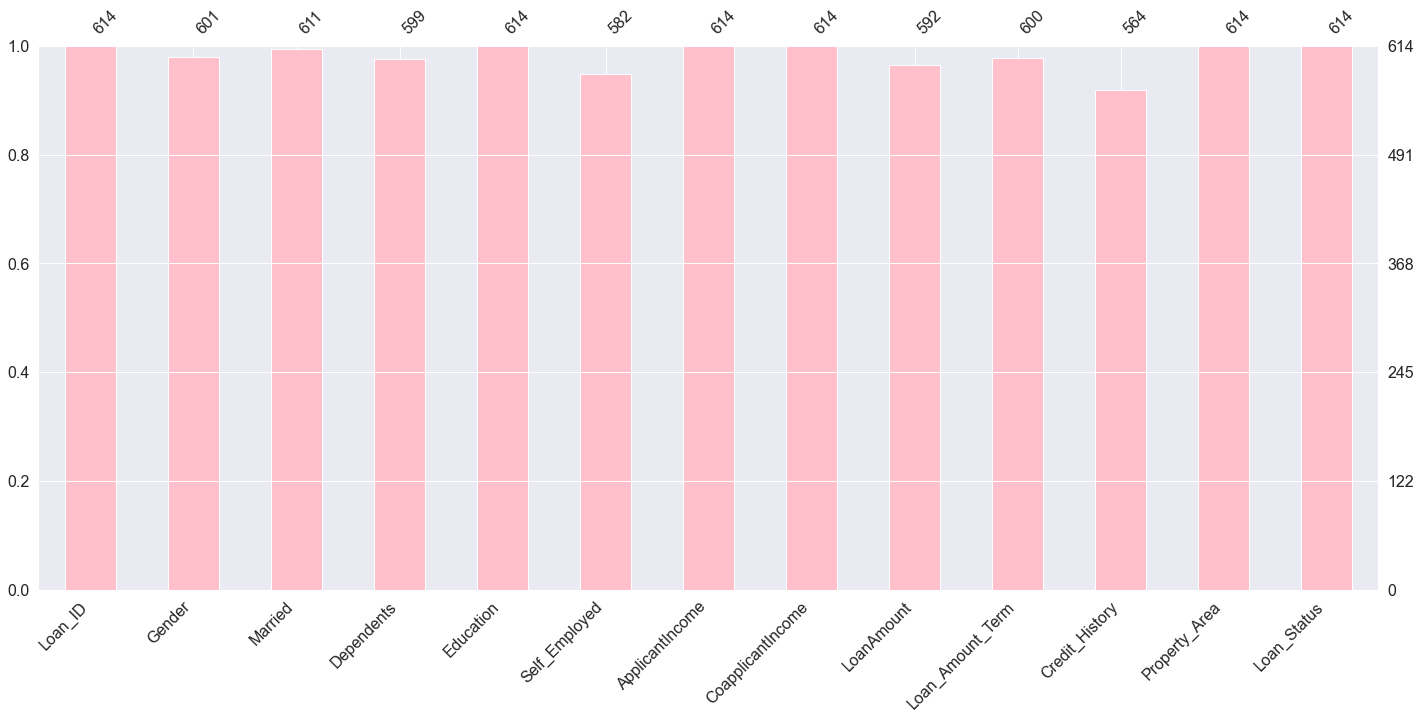

In [32]:
#Visualising missing Values
#Multivariate analysis
msno.bar(df,color = 'pink')

__Replacing missing values of Categorical Variables with mode(most occurred) and Numerical Variable with mean values.__

In [33]:
print("Mode of Gender : ",df['Gender'].mode())
print("\nMode of Married : ",df['Married'].mode())
print("\nMode of Dependents : ",df['Dependents'].mode())
print("\nMode of Self_Employed : ",df['Self_Employed'].mode())
print("\nMode of Credit_History : ",df['Credit_History'].mode())
print("\nMode of Loan_Amount_Term : ",df['Loan_Amount_Term'].mode())
print("\nMean of LoanAmount : ",df['LoanAmount'].mean())

Mode of Gender :  0    Male
dtype: object

Mode of Married :  0    Yes
dtype: object

Mode of Dependents :  0    0
dtype: object

Mode of Self_Employed :  0    No
dtype: object

Mode of Credit_History :  0    1.0
dtype: float64

Mode of Loan_Amount_Term :  0    360.0
dtype: float64

Mean of LoanAmount :  146.41216216216216


In [34]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [35]:
#Filling NaNs
df['Gender'].fillna("Male",inplace=True)
df['Married'].fillna("Yes",inplace=True)
df['Dependents'].fillna(0,inplace=True)
df['Self_Employed'].fillna("No",inplace=True)
df['Loan_Amount_Term'].fillna(360,inplace=True)
df['LoanAmount'].fillna(146,inplace=True)
df['Credit_History'].fillna(1,inplace=True)

In [36]:
#Rechecking for null values after treating them
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
#Dropping Nominal data which  
df.drop('Loan_ID',axis=1,inplace = True)

In [38]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Preparing Dataset for Model Implementation

In [39]:
#Splitting Dataset in Features and Target Variable
X = df.drop('Loan_Status',axis =1)
y = df['Loan_Status']

In [40]:
#Encoding our Target Variable
y.replace({'Y':1,'N':0}, inplace = True)

__Removing Skewness of our Numerical Variables__

In [41]:
#Analysing Skewness
X.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.727127
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

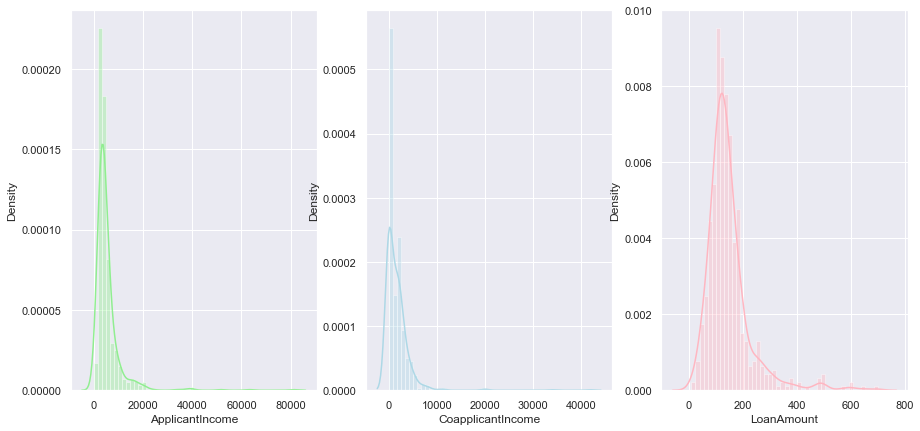

In [42]:
# Multivariate Analaysis
#Visualising outlier and skewness using distribution plot

fig,ax = plt.subplots(1,3, figsize = (15,7))

sns.distplot(df['ApplicantIncome'], color = 'lightgreen', ax = ax[0])
sns.distplot(df['CoapplicantIncome'], color = 'lightblue',ax = ax[1])
sns.distplot(df['LoanAmount'], color = 'lightpink', ax = ax[2])


<AxesSubplot:xlabel='LoanAmount'>

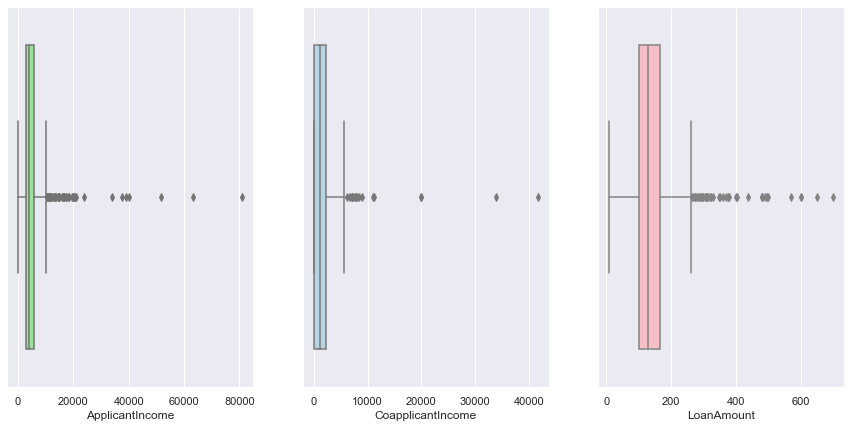

In [43]:
# Multivariate Analaysis
#Visualising outlier and skewness using boxplot

fig,ax = plt.subplots(1,3, figsize = (15,7))

sns.boxplot(df['ApplicantIncome'], color = 'lightgreen', ax = ax[0])
sns.boxplot(df['CoapplicantIncome'], color = 'lightblue',ax = ax[1])
sns.boxplot(df['LoanAmount'], color = 'lightpink', ax = ax[2])


In [44]:
#Removing skewness using Log Transformation

X['ApplicantIncome'] = np.log(X['ApplicantIncome'])
X['ApplicantIncome'].skew()

0.4795799780016222

In [45]:
#Removing skewness using Cuberoot Transformation

X['CoapplicantIncome'] =np.cbrt(X['CoapplicantIncome'])
X['CoapplicantIncome'].skew()

0.19672586559954766

In [46]:
#Removing skewness using Log Transformation

X['LoanAmount'] = np.log(X['LoanAmount'])
X['LoanAmount'].skew()

-0.22268619335133036

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

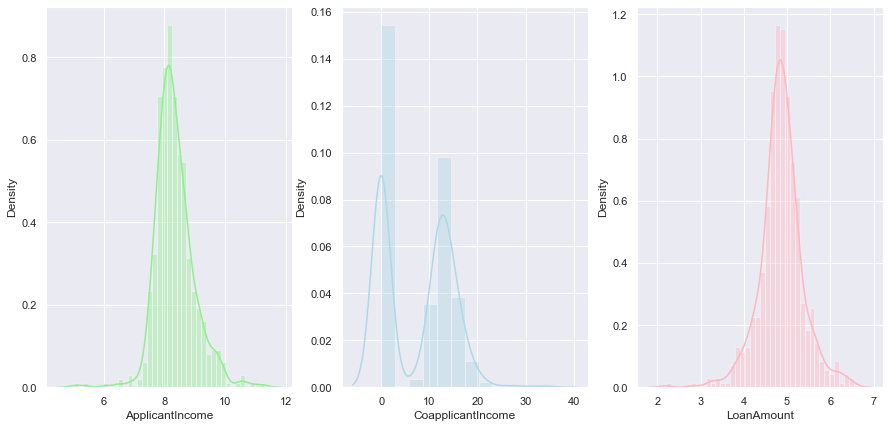

In [47]:
# Multivariate Analaysis
#Visualising outlier and skewness using distribution plot after skewness removal

fig,ax = plt.subplots(1,3, figsize = (15,7))

sns.distplot(X['ApplicantIncome'], color = 'lightgreen', ax = ax[0])
sns.distplot(X['CoapplicantIncome'], color = 'lightblue',ax = ax[1])
sns.distplot(X['LoanAmount'], color = 'lightpink', ax = ax[2])


<AxesSubplot:xlabel='LoanAmount'>

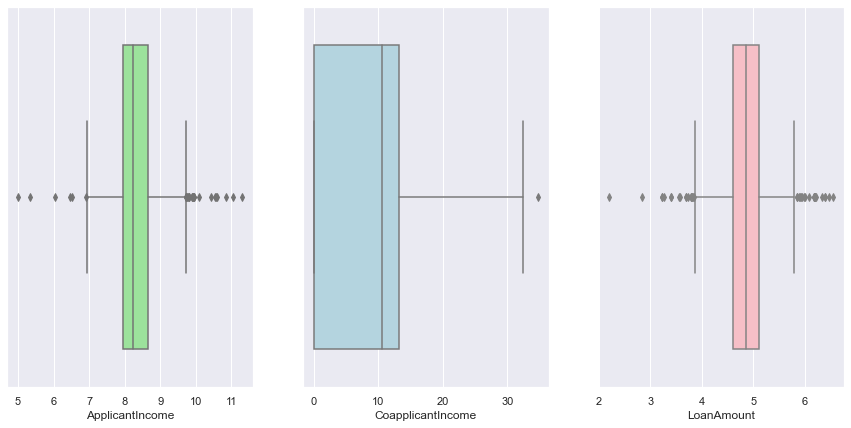

In [48]:
# Multivariate Analaysis
#Visualising outlier and skewness using  boxplot after skewness removal

fig,ax = plt.subplots(1,3, figsize = (15,7))

sns.boxplot(X['ApplicantIncome'], color = 'lightgreen', ax = ax[0])
sns.boxplot(X['CoapplicantIncome'], color = 'lightblue',ax = ax[1])
sns.boxplot(X['LoanAmount'], color = 'lightpink', ax = ax[2])


In [49]:
#Encoding our Categorical Features
X1 = pd.get_dummies(X)
X1

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,8.674026,0.000000,4.983607,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,8.430109,11.467457,4.852030,360.0,1.0,0,1,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,8.006368,0.000000,4.189655,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,7.856707,13.310098,4.787492,360.0,1.0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,8.699515,0.000000,4.948760,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7.972466,0.000000,4.262680,360.0,1.0,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
610,8.320205,0.000000,3.688879,180.0,1.0,0,1,0,1,0,...,0,0,1,1,0,1,0,1,0,0
611,8.996157,6.214465,5.533389,360.0,1.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
612,8.933664,0.000000,5.231109,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

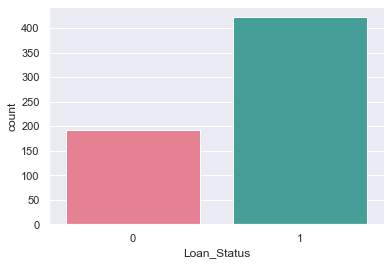

In [50]:
#Analysing class Imbalance in our Target Variable
sns.countplot(y, palette = 'husl')

__Using Random OverSampler for Oversampling to balance our classes.__

In [51]:
#Instantiating Oversampler
ros = RandomOverSampler(random_state=42)

In [52]:
#Fitting our Data
ros.fit(X1, y)

RandomOverSampler(random_state=42)

In [53]:
#converting to numpy array before resampling
X1 = np.array(X1)

In [54]:
#Resampling 
X_resampled, y_resampled = ros.fit_resample(X1, y)

In [55]:
#New Balanced Classes
round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: Loan_Status, dtype: object

Text(0.5, 1.0, 'After using Random Oversampler')

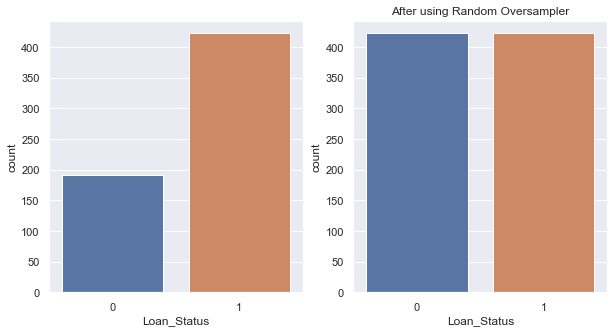

In [56]:
#Visualising class imbalance and after using Random Oversampler

fig, ax = plt.subplots(1,2, figsize = (10,5),)

sns.countplot(y, ax =ax [0])
plt.title("Before using Random Oversampler")

sns.countplot(y_resampled, ax =ax[1])
plt.title("After using Random Oversampler")

### Logistic Regression

In [57]:
#Finding Random state using LogisticRegression
maxAccu=0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc = accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on random_state",maxRS)

Best accuracy is 0.8047337278106509 on random_state 40


In [58]:
#Splitting our Dataset into training(80%) and testing(20%) data
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size = 0.2, random_state = 40)

In [59]:
LR = LogisticRegression(random_state = 40)
LR.fit(X_train,y_train)
predlr = LR.predict(X_test)
acc = accuracy_score(y_test,predlr)
acc

0.8047337278106509

In [60]:
# Performing Evaluation metrics for our model
predlr=LR.predict(X_test)
print('Accuracy Score for Logistic Regression is :',round(accuracy_score(y_test,predlr),4)*100,'% \n')
print('Confusion Matrix of Logistic Regression : \n',confusion_matrix(y_test,predlr), '\n')
print('Classification Logistic Regression : \n',classification_report(y_test,predlr))

Accuracy Score for Logistic Regression is : 80.47 % 

Confusion Matrix of Logistic Regression : 
 [[64 24]
 [ 9 72]] 

Classification Logistic Regression : 
               precision    recall  f1-score   support

           0       0.88      0.73      0.80        88
           1       0.75      0.89      0.81        81

    accuracy                           0.80       169
   macro avg       0.81      0.81      0.80       169
weighted avg       0.82      0.80      0.80       169



array([[64, 24],
       [ 9, 72]], dtype=int64)

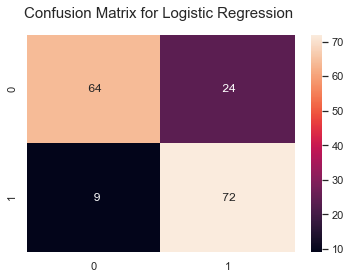

In [61]:
cm = confusion_matrix(y_test,predlr)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predlr),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Logistic Regression ', y=1.05, size=15)
cm

### Decision Tree Classifier

In [62]:
#Instantiating Decision Tree model and training it
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
# Performing Evaluation metrics for our model
preddt=DT.predict(X_test)
print('Accuracy Score for Decision Treee is :',round(accuracy_score(y_test,preddt),4)*100,'% \n')
print('Confusion Matrix of Decision Tree: \n',confusion_matrix(y_test,preddt), '\n')
print('Classification Decision Tree: \n',classification_report(y_test,preddt))

Accuracy Score for Decision Treee is : 85.8 % 

Confusion Matrix of Decision Tree: 
 [[83  5]
 [19 62]] 

Classification Decision Tree: 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87        88
           1       0.93      0.77      0.84        81

    accuracy                           0.86       169
   macro avg       0.87      0.85      0.86       169
weighted avg       0.87      0.86      0.86       169



array([[83,  5],
       [19, 62]], dtype=int64)

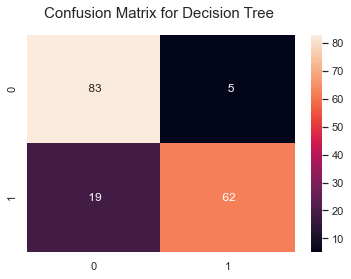

In [64]:
cm = confusion_matrix(y_test,preddt)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,preddt),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Decision Tree ', y=1.05, size=15)
cm

### KNeighbors Classifier

In [65]:
#Instantiating KnN model and training it
knn = KNeighborsClassifier() 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [66]:
# Performing Evaluation metrics for our model
knnpred=knn.predict(X_test)
print('Accuracy Score for KNN is :',round(accuracy_score(y_test,knnpred),4)*100,'% \n')
print('Confusion Matrix of KNN: \n',confusion_matrix(y_test,knnpred), '\n')
print('Classification KNN: \n',classification_report(y_test,knnpred))

Accuracy Score for KNN is : 76.92 % 

Confusion Matrix of KNN: 
 [[72 16]
 [23 58]] 

Classification KNN: 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        88
           1       0.78      0.72      0.75        81

    accuracy                           0.77       169
   macro avg       0.77      0.77      0.77       169
weighted avg       0.77      0.77      0.77       169



array([[72, 16],
       [23, 58]], dtype=int64)

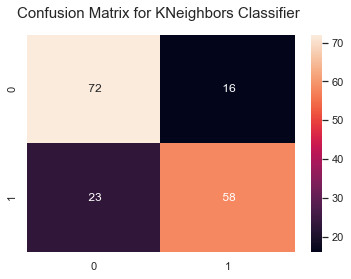

In [67]:
cm = confusion_matrix(y_test,knnpred)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,knnpred),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for KNeighbors Classifier ', y=1.05, size=15)
cm

### Random Forest Classifier

In [68]:
#Model instantiating and traaining it
RF = RandomForestClassifier()
RF.fit(X_train,y_train)


RandomForestClassifier()

In [69]:
# Performing Evaluation metrics for our model
predrf=RF.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 92.9 % 

Confusion Matrix of Random Forest Classifier : 
 [[82  6]
 [ 6 75]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        88
           1       0.93      0.93      0.93        81

    accuracy                           0.93       169
   macro avg       0.93      0.93      0.93       169
weighted avg       0.93      0.93      0.93       169



array([[82,  6],
       [ 6, 75]], dtype=int64)

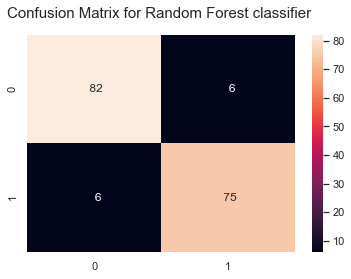

In [70]:
cm = confusion_matrix(y_test,predrf)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predrf),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

### XGB Classifier

In [71]:
#Model instantiating and traaining it
xgb = XGBClassifier()
xgb.fit(X_train,y_train)


[14:59:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
# Performing Evaluation metrics for our model
predxgb = xgb.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predxgb),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predxgb), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predxgb))

Accuracy Score for Random Forest Classifier is : 91.12 % 

Confusion Matrix of Random Forest Classifier : 
 [[84  4]
 [11 70]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92        88
           1       0.95      0.86      0.90        81

    accuracy                           0.91       169
   macro avg       0.92      0.91      0.91       169
weighted avg       0.91      0.91      0.91       169



array([[84,  4],
       [11, 70]], dtype=int64)

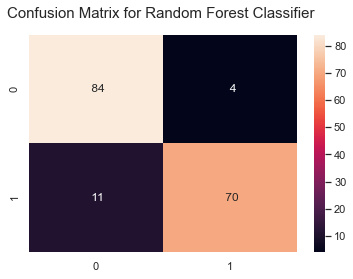

In [73]:
cm = confusion_matrix(y_test,predxgb)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predxgb),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Random Forest Classifier ', y=1.05, size=15)
cm

### Bagging Classifier

In [74]:
bagging  = BaggingClassifier()
bagging.fit(X_train,y_train)

BaggingClassifier()

In [75]:
# Performing Evaluation metrics for our model
predbag = bagging.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predbag),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predbag), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predbag))

Accuracy Score for Random Forest Classifier is : 86.39 % 

Confusion Matrix of Random Forest Classifier : 
 [[82  6]
 [17 64]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        88
           1       0.91      0.79      0.85        81

    accuracy                           0.86       169
   macro avg       0.87      0.86      0.86       169
weighted avg       0.87      0.86      0.86       169



array([[82,  6],
       [17, 64]], dtype=int64)

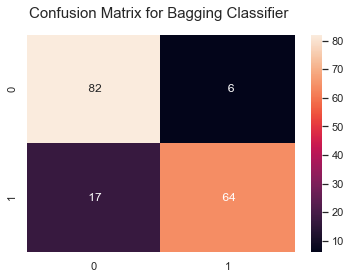

In [76]:
cm = confusion_matrix(y_test,predbag)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,predbag),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Bagging Classifier ', y=1.05, size=15)
cm

#### Getting cross_val_score of all th models we've used so far

In [77]:
CVscore_LR = cross_val_score(LR,X_resampled,y_resampled, cv = 10)
print("Cross validation of Logistic Regression score is :", round(CVscore_LR.mean(),3)*100,'%')

CVscore_DT = cross_val_score(DT,X_resampled,y_resampled,cv = 10 )
print("Cross validation score of Decision Tree is :", round(CVscore_DT.mean(),4)*100,'%')

CVscore_Knn = cross_val_score(knn,X_resampled,y_resampled,cv = 10 )
print("Cross validation score of KNeighbors Classifier :", round(CVscore_Knn.mean(),4)*100,'%')

CVscore_RF = cross_val_score(RF,X_resampled,y_resampled,cv = 10 )
print("Cross validation score of Random Forest Classifier :", round(CVscore_RF.mean(),4)*100,'%')

CVscore_BG = cross_val_score(bagging,X_resampled,y_resampled, cv = 15)
print("Cross validation score of Bagging Classifier:", round(CVscore_BG.mean(),3)*100,'%')

Cross validation of Logistic Regression score is : 71.7 %
Cross validation score of Decision Tree is : 86.39 %
Cross validation score of KNeighbors Classifier : 71.92 %
Cross validation score of Random Forest Classifier : 89.83 %
Cross validation score of Bagging Classifier: 85.9 %


### Plotting Roc-Auc Curve

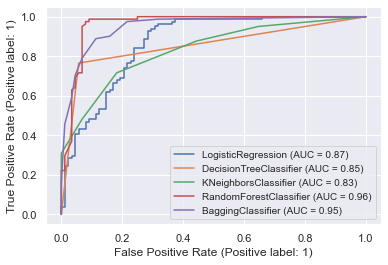

In [78]:
disp = plot_roc_curve(LR,X_test,y_test)

plot_roc_curve(DT ,X_test,y_test,ax=disp.ax_)   #ax_ - axes with confusion matrix

plot_roc_curve(knn,X_test,y_test, ax=disp.ax_)

plot_roc_curve(RF,X_test,y_test, ax=disp.ax_)

plot_roc_curve(bagging,X_test,y_test, ax=disp.ax_)

plt.legend(prop={'size':10}, loc = 'best')


plt.show()

### Conclusion :
- Among all other models Random Forest Classifier Model seems to giving us high scores among all evaluation metrics : 
    - Accuracy Score: 0.92
    - Precision : 0.89
    - Recall : 0.89
    - F1 Score : 0.89
    - cross_val_score : 0.89
    - Auc-Roc-Score : 0.96

### Hyperparameter Tuning of Best Model

In [79]:
grid = {'n_estimators' : [10,20,30,40,50,60,70,80,90],
       'criterion' : ['gini','entropy'],
       'max_depth' : [1,2,3,4,5,6,7],
       "min_samples_split" : [1,2,3,4,5,6],
       "min_samples_leaf" : [1,2,3,4,5,6,7],
       'bootstrap':['True','False']}

In [80]:
#Instantiating Randomized SearchCV
randomcv = RandomizedSearchCV(estimator = RF, param_distributions = grid, n_iter = 100, cv = 3, verbose=2, random_state=42)

In [82]:
randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=60; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=5, n_estimators=90; total time=   0.1s
[CV] END bootstr

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90]},
                   random_state=42, verbose=2)

In [83]:
#To check the best parameters to increase model Accuracy
randomcv.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 7,
 'criterion': 'gini',
 'bootstrap': 'False'}

In [84]:
#Instantiating Our Final Model
model = RandomForestClassifier(n_estimators = 70,min_samples_split =2, min_samples_leaf = 2, max_depth = 7, criterion = 'gini', bootstrap = False)

In [85]:
#Fitting our final Model
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_leaf=2,
                       n_estimators=70)

In [86]:
# Performing Evaluation metrics for our model
predmodel=model.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predmodel),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predmodel), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predmodel))

Accuracy Score for Random Forest Classifier is : 88.17 % 

Confusion Matrix of Random Forest Classifier : 
 [[71 17]
 [ 3 78]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.96      0.81      0.88        88
           1       0.82      0.96      0.89        81

    accuracy                           0.88       169
   macro avg       0.89      0.88      0.88       169
weighted avg       0.89      0.88      0.88       169



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

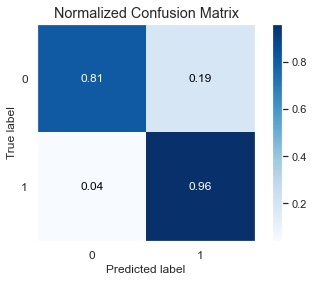

In [87]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, predmodel, normalize=True)

### Saving Our Final Model

In [88]:
joblib.dump(model,"LoanApplicationAnalysis.pkl")

['LoanApplicationAnalysis.pkl']

### Loading Our Saved Model

In [89]:
model = joblib.load("LoanApplicationAnalysis.pkl")

In [90]:
#predicting test data using loaded model
prediction = model.predict(X_test)
prediction

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [91]:
#Analysing Predicted vs Actual
results = pd.DataFrame()
results['Predicted'] = prediction
results['Actual'] = y
results

,Predicted,Actual
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
164,0,1
165,1,1
166,1,0
167,1,1


In [92]:
#Converting the saved file into .csv format
results.to_csv('Results.csv',index = True)